![pres.png](pres.PNG)

##  <div style="color:#9E1A1A">L'intégration numérique </div>

Les méthodes d’intégration numérique sont en général utilisées soit pour intégrer une fonction analytique mais dont on ne peut pas connaître la primitive, soit pour intégrer une fonction connue uniquement sous forme discrète (issue de mesures expérimentales par exemple). Les techniques d’intégration numérique sont souvent basées sur la propriété d’égalité entre la valeur de l’intégrale et l’aire (signée) sous la courbe. 
![intg.png](intg.PNG)

In [35]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from ipywidgets import *

In [36]:
from IPython.display import IFrame
doc = IFrame(src='https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html',width=1000, height=400)
display(doc)

In [37]:
f=lambda x:1/(1+x**2)

In [38]:
class Milieu(object): 
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):
        fig, ax = plt.subplots(1, figsize=(9, 4))
        ax.clear()
        xl = self.x
        yl=f(xl);
        xlist_fine=np.linspace(self.a, self.b, resolution)
                    
        units = 'a = {}  \nb= {} \nn= {} \nI ={}' 
        ax.plot(xl, yl, label=units.format(self.a, self.b,self.n, self.integrate(f)))
        for i in range(self.n):
            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] 
            y_rect = [0   , f(m), f(m)  , 0     , 0   ] 
            plt.plot(x_rect, y_rect,"b")
            yflist_fine = f(xlist_fine)
            plt.plot(xlist_fine, yflist_fine)
            ax.legend(loc=1)
            plt.plot(m,f(m),"y*")
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.title('Milieu')

In [39]:
def simul2 (a,b,n,f):
    R=Milieu(a,b,n,f)
    return R.Graph(f)
a = widgets.IntSlider(min=-1, max=10, value=1, description='a:')
b = widgets.IntSlider(min=-2, max=5, value=0, description='b:')
n=widgets.IntSlider(min=1, max=50, step=5,value=10,description='n:')
widgets.interactive(simul2, a=a, b=b, n=n, f={
                                        '1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),
                                        'cos(x)': lambda x:cos(x),
                                        'x**2-x+5': lambda x:x**2-x+5
                                        }
                   )


interactive(children=(IntSlider(value=1, description='a:', max=10, min=-1), IntSlider(value=0, description='b:…

##  <div style="color:#9E1A1A">Le schéma de Simpson:</div>

La méthode de Simpson consiste à remplacer la courbe  $y = f(x)$ par un arc de parabole sur l’intervalle$ [x_i-_1,x_i+_1]$ , puis à intégrer la fonction ainsi obtenue sur l’intégrale .
![arc.png](arc.PNG)
L’arc de parabole passant par les trois points , on calcule son équation et l’intégrer facilement sur l’intervalle $[x_i-_1,x_i+_1]$
<br> Puisque les intégrales prennent en compte deux intervalles à la fois, il faudra obligatoirement que <strong>le nombre total d’intervalle n soit pair.</strong>

In [40]:
class Simpson(object):
    def __init__(self, a, b, n, f): 
        self.a = a
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n 
    def integrate(self,f):
        x=self.x 
        y=f(x) 
        h = float(x[1] - x[0])
        n = len(x) - 1
        if n % 2 == 1:
            n -= 1
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h * s / 3.0
    def Graph(self,f,resolution=1001):
        xl = self.x 
        yl = f(xl) 
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            xx=np.linspace(xl[i], xl[i+1], resolution)
            m=(xl[i]+xl[i+1])/2
            a=xl[i]
            b=xl[i+1]#borne droite
            l0 = (xx-m)/(a-m)*(xx-b)/(a-b)
            l1 = (xx-a)/(m-a)*(xx-b)/(m-b)
            l2 = (xx-a)/(b-a)*(xx-m)/(b-m)
            P = f(a)*l0 + f(m)*l1 + f(b)*l2
            plt.plot(xx,P,'m')
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,'g')
        plt.plot(xl, yl,'wp')
        
        plt.ylabel('f(x)')
        plt.title('Simpson')

In [41]:
@widgets.interact_manual( 
            color=['blue', 'red', 'green'],
            a = widgets.IntSlider(min=-1, max=10, value=1, description='a:'),
            b = widgets.IntSlider(min=-2, max=5, value=0, description='b:'),
            n=widgets.IntSlider(min=1, max=50, step=5,value=10,description='n:'),
            f={
                 '1/(1+x**2)': lambda x:1/(1+x**2), 
                  'sin(x)': lambda x:sin(x),
                  'cos(x)': lambda x:cos(x),
                   'x**2-x+5': lambda x:x**2-x+5
            }
                   )
def plot(a=-1, f='1/(1+x**2)',b=1,n=4, grid=True,color='red'):
    S = Simpson(a, b, n, f)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.grid(grid)
    return S.Graph(f)

interactive(children=(IntSlider(value=1, description='a:', max=10, min=-1), Dropdown(description='f', options=…

##  <div style="color:#9E1A1A">La méthode des rectangles: </div>

Considérons donc une fonction de $R$ dans $R$ continue sur un intervalle $[a,b]$. Pour un physicien, intégrer signifie la plupart du temps calculer l'aire sous la courbe de la fonction entre a et b. 
La première méthode qui vienne à l'esprit, c'est de découper l'aire entre la courbe $f(x)$, l'axe des x et les droites$ x= a $et $x = b$, en une multitude de petits rectangles. Découpons l'intervalle $[a,b]$ en rectangles élémentaires de largeur h, h étant petit. Le rectangle n° i aura donc pour longueur $f(a + i*h)$. Sa surface est donc égale à $h*f(a + i*h)$. L'aire sous la courbe entre a et b est obtenue en sommant tous ces petits rectangles. Reste qu'en posant cette relation, j'ai fait l'hypothèse implicite que la courbe limite le coté gauche de mon rectangle. On peut imaginer d'autres découpages. Voyons cela sur un schéma.

In [42]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f(x)
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] 
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ]
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.4f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [43]:
interact (simul, n=widgets.IntSlider(
    min=1, max=50, step=5,value=10), f={'1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),'cos(x)': lambda x:cos(x),'x**2-x+5': lambda x:x**2-x+5})

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

<function __main__.simul(n, f)>

##  <div style="color:#9E1A1A">La méthode des trapèzes: </div>

On considère une fonction $f(x)$ définie sur un intervalle $[a,b]$  , et dont on veut calculer l’intégrale $ ∫ f(x) dx$ sur ce même intervalle. La méthode des trapèzes consiste à diviser l’intervalle $[a,b]$  en une série d’intervalles $[x_i-_1,x_i]$   , à remplacer la courbe $y = f(x)$ par un segment de droite, et à calculer l’aire du trapèze ainsi obtenu.
![trapeze.png](trapeze.PNG)

In [44]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] 
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] 
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)
        plt.plot(xl, yl,"cs")
        
        plt.ylabel('f(x)')
        plt.text(0.2*(self.a+self.b), 0.25*f(self.b), '$I_{%s} =\int_{a}^{b}f(x)dx$=%12.4f' % (self.n,self.integrate(f)), fontsize=15)   
        

In [45]:
def simul (n,f):
    R=Trapezoidal(-1,1,n,f)
    return R.Graph(f)

In [46]:
interact (simul, n=widgets.IntSlider(
    min=1, max=50, step=5,value=10), f={'1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),'cos(x)': lambda x:cos(x),'x**2-x+5': lambda x:x**2-x+5})

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

<function __main__.simul(n, f)>

In [47]:
def sim(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f)
    fig=plt.figure(figsize=(12,2))
    plt.subplot(121)
    R.Graph(f)
    plt.subplot(122)
    T.Graph(f)
    plt.show()  

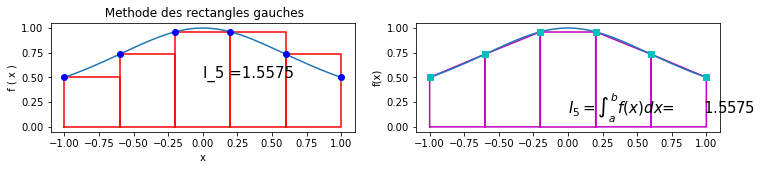

In [48]:
sim(5,f)

In [49]:
interact (sim, n=widgets.IntSlider(
    min=1, max=50, step=5,value=10), f={'1/(1+x**2)': lambda x:1/(1+x**2), 
                                        'sin(x)': lambda x:sin(x),'cos(x)': lambda x:cos(x),'x**2-x+5': lambda x:x**2-x+5})

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=5), Dropdown(description='f', o…

<function __main__.sim(n, f)>

In [50]:
class Milieu1(object): 
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x# contiens les xi
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):

        xl = self.x
        yl=f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)

       
        
        for i in range(self.n):
            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , f(m), f(m)  , 0     , 0   ] # ordonnees des sommets

            
            plt.plot(x_rect, y_rect,"b")
            yflist_fine = f(xlist_fine)
            plt.plot(xlist_fine, yflist_fine)
            plt.plot(m,f(m),"y*")
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.title('Milieu')    

No handles with labels found to put in legend.


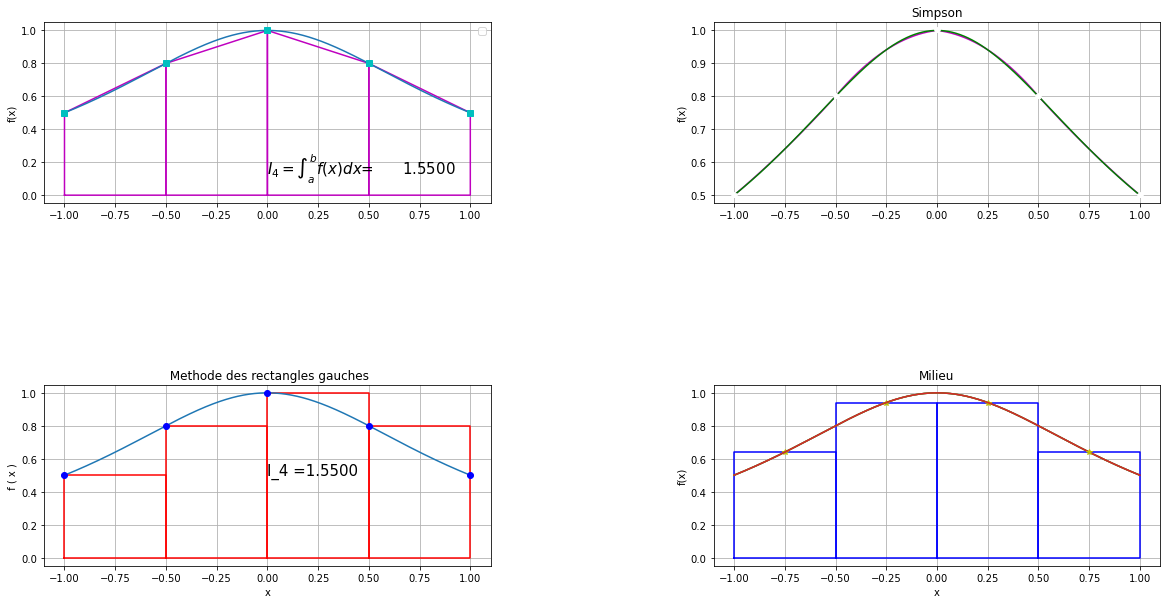

In [51]:
def simulation(n,f):
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f)
    S=Simpson(-1,1,n,f)
    M=Milieu1(-1,1,n,f)
    fig=plt.figure(figsize = (20, 10))
    plt.gcf().subplots_adjust( wspace = 0.5, hspace = 1)
    ax = fig.add_subplot(221) 
    ax.grid()#grid on
    ax.legend(loc=1)
    T.Graph(f) 
    ax = fig.add_subplot(222)
    ax.grid()
    S.Graph(f)
    ax = fig.add_subplot(223)
    ax.grid()
    R.Graph(f)
    ax = fig.add_subplot(224)
    ax.grid()
    M.Graph(f)  
    plt.show()  
simulation(4,f)